## Figure2: Total effect of entropy and surprisal

This notebook contains all code used to set up figure 2, which contains group-level results from an activation-based GLM analysis done in SPM. The chosen contrasts illustrate the total effect that either a decrease in entropy or an increase in surprise has on natural language processing.

#TODO 
- Adjust sizes of subplots
- add legend
- add comments

In [89]:
from nilearn import image
from nilearn import plotting
from nilearn import surface
from nilearn import datasets
from nilearn.datasets import MNI152_FILE_PATH
from matplotlib import pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.colors import LinearSegmentedColormap

from matplotlib.colorbar import ColorbarBase

import matplotlib.patches as mpatches
import numpy as np

TypeError: __init__() got an unexpected keyword argument 'expand'

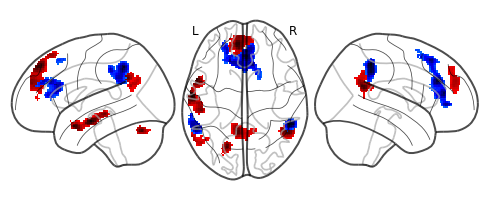

In [138]:
entropy_main = "data\\NegEntropy_both_p001_k89.nii"
surprisal_main = "data\\surprisal_both_p001k89.nii"

#setting up figure
#fig, axes = 

# plotting glass brain
display = plotting.plot_glass_brain(surprisal_main, display_mode = 'lzr')#, colorbar = True, threshold = 3.2) 
display.add_overlay(entropy_main, cmap= plotting.cm.black_blue_r, vmin = 2)#, colorbar = True, threshold = 3.2)# vmin is really important to make the colors work properly

#display.legend([red_patch, blue_patch],['Surprisal Increase', 'Entropy Decrease'], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)


# artist proxies for legend
red_patch = mpatches.Patch(color='red', label='Surprisal Increase')
blue_patch = mpatches.Patch(color='blue', label='Entropy Decrease')

#plt.legend([red_patch, blue_patch],['Surprisal Increase', 'Entropy Decrease'], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

display.axes['z'].ax.legend([red_patch, blue_patch],['Surprisal Increase', 'Entropy Decrease'], loc = 'lower center', bbox_to_anchor=(0.75, -0.3), ncol = 2, fontsize = 16, expand = True)#, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)


plt.savefig("Figure2.png")


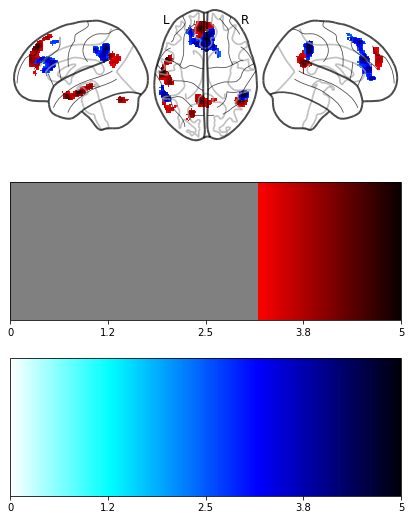

In [172]:
# setting up subplot structures
fig = plt.figure(figsize = (7,9))

# gridspec tool
gs = fig.add_gridspec(3, 1, hspace = 0.28, wspace = 0.1, height_ratios = (1, 1, 1))
#gs.set_height_ratios(5,1)

# 5 axes
ax1 = fig.add_subplot(gs[0, :]) # frames
ax4 = fig.add_subplot(gs[1, :]) # entropy distribution histogram
ax5 = fig.add_subplot(gs[2, :]) # surprisal distribution histogram

display = plotting.plot_glass_brain(surprisal_main, display_mode = 'lzr', axes = ax1)#, colorbar = True, threshold = 3.2) 
display.add_overlay(entropy_main, cmap= plotting.cm.black_blue_r, vmin = 2)#, colorbar = True, threshold = 3.2)# vmin is really important to make the colors work properly
ColorbarBase(
            ax4, ticks=ticks, norm=norm,
            orientation='horizontal', cmap=our_cmap, boundaries=bounds,
            spacing='proportional', format='%.2g')

ColorbarBase(
            ax5, ticks=ticks, norm=norm,
            orientation='horizontal', cmap=plotting.cm.black_blue_r, boundaries=bounds,
            spacing='proportional', format='%.2g')


In [116]:
display.axes['l'].ax

(1.0, 1.0, 0.8764704647057588, 1.0)


C:\Users\gffun\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


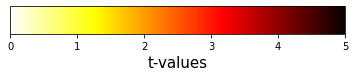

In [80]:
# make a colorbar
fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)

cmap = plotting.cm.black_red_r
norm = Normalize(vmin=0, vmax=5)

cb1 = ColorbarBase(ax, cmap=cmap,
                                norm=norm,
                                orientation='horizontal',
                  )
cb1.set_label('t-values', size = 15)
fig.show()
print(cmap(8))

In [107]:
our_cmap = plotting.cm.black_red_r
offset = 3.2

nb_ticks = 5
ticks = np.linspace(norm.vmin, norm.vmax, nb_ticks)
bounds = np.linspace(norm.vmin, norm.vmax, our_cmap.N)

# some colormap hacking from https://github.com/nilearn/nilearn/blob/80572dbf2253bd7a5a00e688082cbd3075e71a12/nilearn/plotting/displays.py#L915
cmaplist = [our_cmap(i) for i in range(our_cmap.N)]
transparent_start = int(norm(-offset, clip=True) * (our_cmap.N - 1))
transparent_stop = int(norm(offset, clip=True) * (our_cmap.N - 1))

for i in range(transparent_start, transparent_stop):
    cmaplist[i] = (0.5, 0.5, 0.5) + (1,)  # transparent

our_cmap = LinearSegmentedColormap.from_list('Custom cmap', cmaplist, our_cmap.N)



(1.0, 1.0, 0.8764704647057588, 1.0)


C:\Users\gffun\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


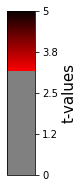

In [109]:
# make a colorbar
fig, ax = plt.subplots(figsize=(0.5, 6))
fig.subplots_adjust(bottom=0.5)

cmap = plotting.cm.black_red_r
norm = Normalize(vmin=0, vmax=5)

cb1 =  ColorbarBase(
            ax, ticks=ticks, norm=norm,
            orientation='vertical', cmap=our_cmap, boundaries=bounds,
            spacing='proportional', format='%.2g')

cb1.set_label('t-values', size = 15)
fig.show()
print(cmap(8))

## Figure 2

Glass brain representation of activations associated with increase in suprisal (red) or decrease in next-word entropy (p = 0.001). Color indicates activation strength (T-values).

In [24]:
# finding out threshold of entropy_dec_NK_K
import nibabel as nib

def find_threshold(imagepath):
    """
    This function takes a path to a Nifti image,
    loads it, and gives you the smallest value.
    Useful for identifying the threshold you used 
    as a T-value im thresholded SPMs
    """
    
    img = nib.load(imagepath) # load Nifti
    dat = np.array(img.get_fdata()) # load image into numpy array
    dat = dat[~np.isnan(dat)] # remove all nan
    return np.min(dat) # this is the threshold, in T-values

#print(find_threshold(entropy_dec_NK_K))


In [26]:
find_threshold(surprisal_main)

3.2013769149780273